In [5]:
# Imports
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from icecream import ic

# custom Imports
from evaluate import evaluate_model, confusion_matrix_heatmap
from predata import target_train_tfidf, target_test_tfidf, test_train, test_test, target_train, target_test

In [6]:
########## Pipeline and Params

pipe = Pipeline(
    [("smote", SMOTE(random_state=0)), ("rf", RandomForestClassifier(random_state=0))]
)

parameters = {"rf__max_depth": [None], "rf__n_estimators": [100]}


In [7]:
########### Searching Via GridSearchCV with Pipeline

rf_classifier = GridSearchCV(pipe, parameters, cv=3, n_jobs=-1)
rf_classifier.fit(target_train_tfidf, test_train)
ic(rf_classifier.best_estimator_)

ic| rf_classifier.best_estimator_: Pipeline(steps=[('smote', SMOTE(random_state=0)),
                                                   ('rf', RandomForestClassifier(random_state=0))])


Pipeline(steps=[('smote', SMOTE(random_state=0)),
                ('rf', RandomForestClassifier(random_state=0))])

In [8]:
# EVALUATING THIS CLASSIFIER
evaluate_model(
    target_train_tfidf, test_train, target_test_tfidf, test_test, rf_classifier
)

ic| scorings: array([0.39757085, 0.39141005, 0.38006483])
ic| model_score: 0.3441295546558704
ic| accuracy: 0.3441295546558704
ic| confusion: array([[ 86, 191,  48],
                      [159, 273, 114],
                      [113, 185,  66]])


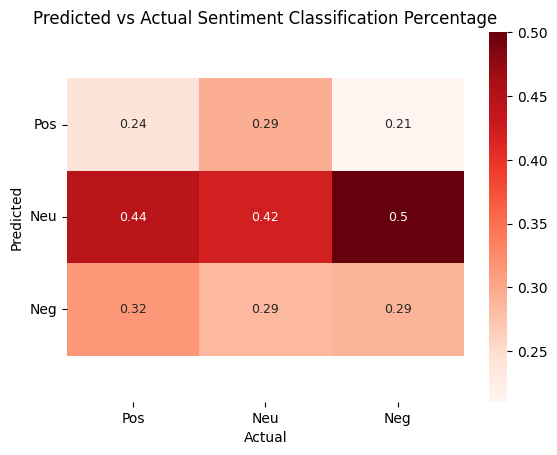

In [9]:
confusion_matrix_heatmap(rf_classifier, target_test_tfidf, test_test)